# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 35kB/s  eta 0:00:01   67% |█████████████████████▋          | 9.8MB 40.2MB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

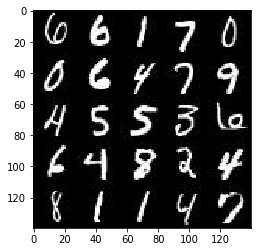

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

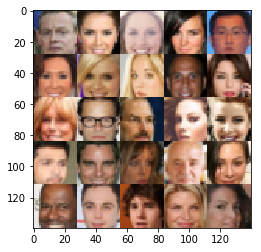

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function Workit!!!

    real_imgs_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), 'real_input')
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), 'z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return real_imgs_inputs, z_inputs, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start\n    handler_func(fd_obj, events)', 'File "/opt/conda/lib/

In [6]:
#Allet wat unten einjefugt is noch abchecken wo es her kommt!

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [8]:
# Vong Ilton oben drueber jepackt
# Constants reusable for adversarials
stride = 5
padding = 2
img_filter_size = 64
h2_img_filter_size = img_filter_size*2
h3_img_filter_size = img_filter_size*4

def discriminator(images, reuse=False):
    
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        # No alpha given so making a test        
        alpha = 0.2      
        
        # 1st Hidden layer
        h1 = tf.layers.conv2d(images, img_filter_size, stride, padding, 'same')
        h1 = tf.maximum(alpha * h1, h1) # Leaky ReLU
        
        # 2nd Hidden layer
        h2 = tf.layers.conv2d(h1, h2_img_filter_size, stride, padding, 'same')
        h2 = tf.layers.batch_normalization(h2, training=True) # Batch normalizing
        h2 = tf.maximum(alpha * h2, h2) # Leaky ReLU
        
        # 3rd Hidden layer
        h3 = tf.layers.conv2d(h2, h3_img_filter_size, stride, padding, 'same')
        h3 = tf.layers.batch_normalization(h3, training=True) # Batch normalizing
        h3 = tf.maximum(alpha * h3, h3) # Leaky ReLU
        
        flat = tf.reshape(h3, (-1, 4*4*h3_img_filter_size))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        # Using the reverse process of the discriminator
        alpha = 0.2
    
        h1 = tf.layers.dense(z, 2*2*h3_img_filter_size)
        h1 = tf.reshape(h1, (-1, 2, 2, h3_img_filter_size))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(h1, h2_img_filter_size, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
    
        h3 = tf.layers.conv2d_transpose(h2, img_filter_size, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    # Calculate the Losses for it real, fake & generated models
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    # The Discriminator Loss is the amount of it fake img loss + it real img loss
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Empty TF TrainableVariables
    t_vars = tf.trainable_variables()
    # Append var to D & G vars arraies if it starts with the "prefix" for on it name
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # discriminator optimization
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)
    
    # UPDATE OPS GraphKeys
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, img_width, img_height, img_channels = data_shape
    real_input_img, z_input, lr = model_inputs(img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input_img, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    losses = []
    n_images = 25        
    print_every = 10
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1 # next batch
                batch_images *= 2.0 # the image is increasing by double for each layer
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim)) # uniform distribution
                
                # performing d_opt with the feed_dict knowledge
                _ = sess.run(d_opt, feed_dict={real_input_img: batch_images, z_input: z_sample, lr: learning_rate})
                # performing g_opt with the feed_dict knowledge
                _ = sess.run(g_opt, feed_dict={z_input: z_sample, lr: learning_rate})
                
                # Check if is it time to print the Loss or just keep going (skip the print)
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input_img: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                # Showing the generator output based on show_every step
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.3303... Generator Loss: 14.8745
Epoch 1/2... Discriminator Loss: 0.7168... Generator Loss: 1.8643
Epoch 1/2... Discriminator Loss: 0.7000... Generator Loss: 2.1144
Epoch 1/2... Discriminator Loss: 1.0767... Generator Loss: 3.5882
Epoch 1/2... Discriminator Loss: 1.1517... Generator Loss: 0.4770
Epoch 1/2... Discriminator Loss: 0.8554... Generator Loss: 6.9907
Epoch 1/2... Discriminator Loss: 0.9828... Generator Loss: 3.9710
Epoch 1/2... Discriminator Loss: 0.3344... Generator Loss: 2.8222
Epoch 1/2... Discriminator Loss: 0.3223... Generator Loss: 1.9446
Epoch 1/2... Discriminator Loss: 0.7400... Generator Loss: 1.8210


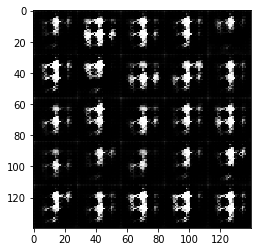

Epoch 1/2... Discriminator Loss: 2.3201... Generator Loss: 0.1274
Epoch 1/2... Discriminator Loss: 0.2244... Generator Loss: 3.8758
Epoch 1/2... Discriminator Loss: 0.7669... Generator Loss: 0.9953
Epoch 1/2... Discriminator Loss: 0.1733... Generator Loss: 4.5354
Epoch 1/2... Discriminator Loss: 0.3343... Generator Loss: 1.8357
Epoch 1/2... Discriminator Loss: 0.4118... Generator Loss: 1.6593
Epoch 1/2... Discriminator Loss: 0.2885... Generator Loss: 2.4719
Epoch 1/2... Discriminator Loss: 0.2780... Generator Loss: 2.4838
Epoch 1/2... Discriminator Loss: 0.4835... Generator Loss: 1.6189
Epoch 1/2... Discriminator Loss: 0.5337... Generator Loss: 2.2465


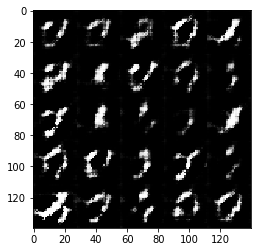

Epoch 1/2... Discriminator Loss: 1.7691... Generator Loss: 0.3551
Epoch 1/2... Discriminator Loss: 0.6873... Generator Loss: 1.1899
Epoch 1/2... Discriminator Loss: 0.6753... Generator Loss: 2.0187
Epoch 1/2... Discriminator Loss: 0.3356... Generator Loss: 3.1841
Epoch 1/2... Discriminator Loss: 0.6891... Generator Loss: 2.0729
Epoch 1/2... Discriminator Loss: 0.6772... Generator Loss: 1.4878
Epoch 1/2... Discriminator Loss: 0.6774... Generator Loss: 2.3189
Epoch 1/2... Discriminator Loss: 0.3733... Generator Loss: 2.4400
Epoch 1/2... Discriminator Loss: 0.5235... Generator Loss: 3.7454
Epoch 1/2... Discriminator Loss: 0.5537... Generator Loss: 2.3386


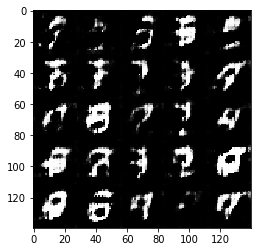

Epoch 1/2... Discriminator Loss: 0.3830... Generator Loss: 2.4167
Epoch 1/2... Discriminator Loss: 0.5678... Generator Loss: 1.8156
Epoch 1/2... Discriminator Loss: 0.7993... Generator Loss: 2.7970
Epoch 1/2... Discriminator Loss: 0.5245... Generator Loss: 2.9547
Epoch 1/2... Discriminator Loss: 0.7256... Generator Loss: 2.0346
Epoch 1/2... Discriminator Loss: 0.8443... Generator Loss: 1.7055
Epoch 1/2... Discriminator Loss: 0.6460... Generator Loss: 2.6560
Epoch 1/2... Discriminator Loss: 1.0656... Generator Loss: 0.8000
Epoch 1/2... Discriminator Loss: 0.8314... Generator Loss: 1.0077
Epoch 1/2... Discriminator Loss: 0.9086... Generator Loss: 2.6661


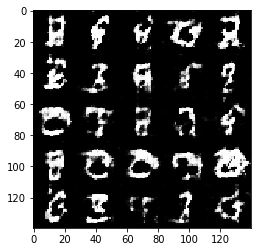

Epoch 1/2... Discriminator Loss: 0.6980... Generator Loss: 1.2574
Epoch 1/2... Discriminator Loss: 0.7726... Generator Loss: 1.2066
Epoch 1/2... Discriminator Loss: 0.6081... Generator Loss: 1.4798
Epoch 1/2... Discriminator Loss: 0.5407... Generator Loss: 1.5134
Epoch 1/2... Discriminator Loss: 1.7926... Generator Loss: 0.4317
Epoch 1/2... Discriminator Loss: 1.5568... Generator Loss: 0.4645
Epoch 1/2... Discriminator Loss: 0.9086... Generator Loss: 1.0539
Epoch 1/2... Discriminator Loss: 1.0311... Generator Loss: 1.6446
Epoch 1/2... Discriminator Loss: 0.7652... Generator Loss: 2.1678
Epoch 1/2... Discriminator Loss: 0.6608... Generator Loss: 1.6226


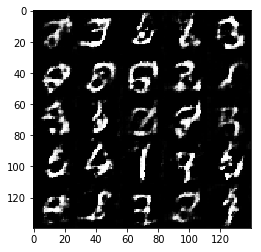

Epoch 1/2... Discriminator Loss: 1.4111... Generator Loss: 0.4208
Epoch 1/2... Discriminator Loss: 0.8502... Generator Loss: 0.9995
Epoch 1/2... Discriminator Loss: 0.8904... Generator Loss: 0.9773
Epoch 1/2... Discriminator Loss: 0.8053... Generator Loss: 1.5266
Epoch 1/2... Discriminator Loss: 0.9444... Generator Loss: 0.9163
Epoch 1/2... Discriminator Loss: 0.7613... Generator Loss: 1.4048
Epoch 1/2... Discriminator Loss: 0.6179... Generator Loss: 1.9701
Epoch 1/2... Discriminator Loss: 1.3603... Generator Loss: 2.5332
Epoch 1/2... Discriminator Loss: 0.6801... Generator Loss: 1.2766
Epoch 1/2... Discriminator Loss: 1.5240... Generator Loss: 4.4327


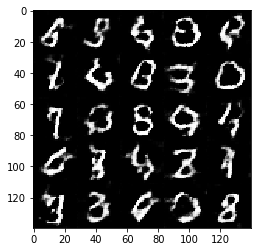

Epoch 1/2... Discriminator Loss: 0.5336... Generator Loss: 1.6299
Epoch 1/2... Discriminator Loss: 0.7876... Generator Loss: 2.3461
Epoch 1/2... Discriminator Loss: 0.9929... Generator Loss: 1.0765
Epoch 1/2... Discriminator Loss: 1.7618... Generator Loss: 0.4662
Epoch 1/2... Discriminator Loss: 0.7781... Generator Loss: 1.9107
Epoch 1/2... Discriminator Loss: 1.2860... Generator Loss: 3.3789
Epoch 1/2... Discriminator Loss: 0.8427... Generator Loss: 1.1532
Epoch 1/2... Discriminator Loss: 0.7485... Generator Loss: 1.5784
Epoch 1/2... Discriminator Loss: 1.1578... Generator Loss: 0.6053
Epoch 1/2... Discriminator Loss: 1.1972... Generator Loss: 0.6806


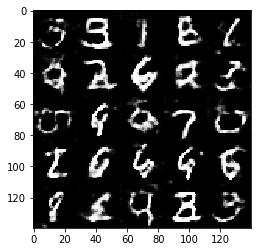

Epoch 1/2... Discriminator Loss: 0.9418... Generator Loss: 1.1707
Epoch 1/2... Discriminator Loss: 0.9545... Generator Loss: 1.0644
Epoch 1/2... Discriminator Loss: 0.8277... Generator Loss: 1.4253
Epoch 1/2... Discriminator Loss: 0.6826... Generator Loss: 1.4006
Epoch 1/2... Discriminator Loss: 0.8179... Generator Loss: 1.0637
Epoch 1/2... Discriminator Loss: 1.0631... Generator Loss: 0.7041
Epoch 1/2... Discriminator Loss: 0.8377... Generator Loss: 1.2916
Epoch 1/2... Discriminator Loss: 0.8669... Generator Loss: 1.2909
Epoch 1/2... Discriminator Loss: 0.8031... Generator Loss: 1.2081
Epoch 1/2... Discriminator Loss: 0.9418... Generator Loss: 1.4497


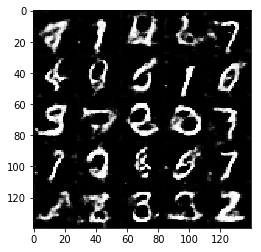

Epoch 1/2... Discriminator Loss: 0.7503... Generator Loss: 1.7770
Epoch 1/2... Discriminator Loss: 0.9755... Generator Loss: 0.6998
Epoch 1/2... Discriminator Loss: 1.1649... Generator Loss: 3.0340
Epoch 1/2... Discriminator Loss: 1.5644... Generator Loss: 0.4521
Epoch 1/2... Discriminator Loss: 1.1563... Generator Loss: 0.5569
Epoch 1/2... Discriminator Loss: 0.8420... Generator Loss: 1.9138
Epoch 1/2... Discriminator Loss: 0.8327... Generator Loss: 1.4431
Epoch 1/2... Discriminator Loss: 0.8265... Generator Loss: 1.5282
Epoch 1/2... Discriminator Loss: 0.8759... Generator Loss: 1.2816
Epoch 1/2... Discriminator Loss: 1.1417... Generator Loss: 0.5808


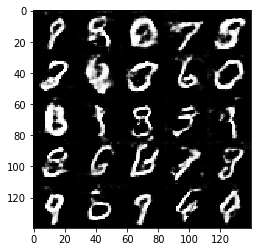

Epoch 1/2... Discriminator Loss: 0.9187... Generator Loss: 0.9439
Epoch 1/2... Discriminator Loss: 0.6740... Generator Loss: 1.1689
Epoch 1/2... Discriminator Loss: 1.0632... Generator Loss: 0.8277
Epoch 2/2... Discriminator Loss: 1.1917... Generator Loss: 0.5693
Epoch 2/2... Discriminator Loss: 0.8734... Generator Loss: 0.8598
Epoch 2/2... Discriminator Loss: 0.8148... Generator Loss: 1.5963
Epoch 2/2... Discriminator Loss: 1.0446... Generator Loss: 0.7097
Epoch 2/2... Discriminator Loss: 0.9799... Generator Loss: 0.7386
Epoch 2/2... Discriminator Loss: 0.8843... Generator Loss: 2.1267
Epoch 2/2... Discriminator Loss: 0.8611... Generator Loss: 1.4641


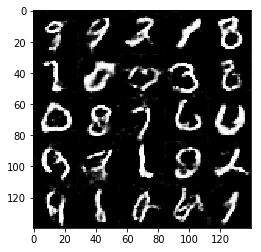

Epoch 2/2... Discriminator Loss: 0.9286... Generator Loss: 2.7235
Epoch 2/2... Discriminator Loss: 1.0121... Generator Loss: 0.7965
Epoch 2/2... Discriminator Loss: 0.8972... Generator Loss: 1.2994
Epoch 2/2... Discriminator Loss: 0.8603... Generator Loss: 1.1230
Epoch 2/2... Discriminator Loss: 0.9398... Generator Loss: 0.8261
Epoch 2/2... Discriminator Loss: 1.2447... Generator Loss: 1.3375
Epoch 2/2... Discriminator Loss: 0.8232... Generator Loss: 1.2684
Epoch 2/2... Discriminator Loss: 0.8208... Generator Loss: 1.8510
Epoch 2/2... Discriminator Loss: 0.8821... Generator Loss: 0.9105
Epoch 2/2... Discriminator Loss: 0.9005... Generator Loss: 1.0528


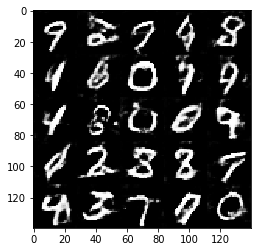

Epoch 2/2... Discriminator Loss: 1.6105... Generator Loss: 0.3265
Epoch 2/2... Discriminator Loss: 1.4343... Generator Loss: 0.3798
Epoch 2/2... Discriminator Loss: 0.7959... Generator Loss: 1.3965
Epoch 2/2... Discriminator Loss: 1.1725... Generator Loss: 1.6106
Epoch 2/2... Discriminator Loss: 1.6829... Generator Loss: 0.3377
Epoch 2/2... Discriminator Loss: 0.9498... Generator Loss: 1.3758
Epoch 2/2... Discriminator Loss: 0.7247... Generator Loss: 1.8116
Epoch 2/2... Discriminator Loss: 1.0746... Generator Loss: 0.6342
Epoch 2/2... Discriminator Loss: 0.9459... Generator Loss: 2.0012
Epoch 2/2... Discriminator Loss: 1.5090... Generator Loss: 0.4313


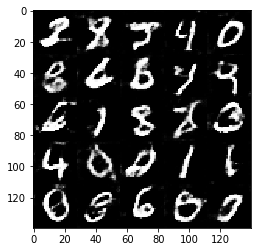

Epoch 2/2... Discriminator Loss: 0.8077... Generator Loss: 0.9927
Epoch 2/2... Discriminator Loss: 0.6538... Generator Loss: 1.2343
Epoch 2/2... Discriminator Loss: 1.3900... Generator Loss: 2.5278
Epoch 2/2... Discriminator Loss: 0.8276... Generator Loss: 1.0797
Epoch 2/2... Discriminator Loss: 0.7955... Generator Loss: 1.4330
Epoch 2/2... Discriminator Loss: 1.4000... Generator Loss: 2.4134
Epoch 2/2... Discriminator Loss: 0.9781... Generator Loss: 0.7385
Epoch 2/2... Discriminator Loss: 2.7977... Generator Loss: 5.0417
Epoch 2/2... Discriminator Loss: 0.9898... Generator Loss: 1.1058
Epoch 2/2... Discriminator Loss: 0.9982... Generator Loss: 0.8162


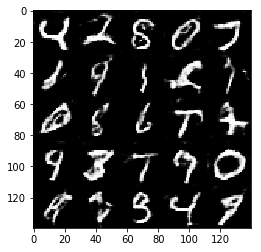

Epoch 2/2... Discriminator Loss: 0.8924... Generator Loss: 0.9928
Epoch 2/2... Discriminator Loss: 0.7947... Generator Loss: 1.7565
Epoch 2/2... Discriminator Loss: 2.1607... Generator Loss: 4.0085
Epoch 2/2... Discriminator Loss: 0.9872... Generator Loss: 1.1694
Epoch 2/2... Discriminator Loss: 0.9797... Generator Loss: 1.2074
Epoch 2/2... Discriminator Loss: 1.2735... Generator Loss: 0.5343
Epoch 2/2... Discriminator Loss: 0.8216... Generator Loss: 1.1849
Epoch 2/2... Discriminator Loss: 0.9349... Generator Loss: 0.6946
Epoch 2/2... Discriminator Loss: 0.8661... Generator Loss: 2.5732
Epoch 2/2... Discriminator Loss: 1.1117... Generator Loss: 0.6907


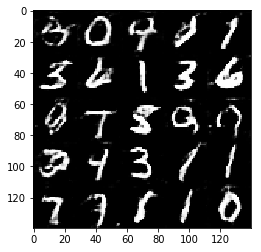

Epoch 2/2... Discriminator Loss: 1.2228... Generator Loss: 0.5032
Epoch 2/2... Discriminator Loss: 0.8298... Generator Loss: 1.3078
Epoch 2/2... Discriminator Loss: 0.7533... Generator Loss: 1.6665
Epoch 2/2... Discriminator Loss: 0.9732... Generator Loss: 0.7938
Epoch 2/2... Discriminator Loss: 0.9651... Generator Loss: 0.8025
Epoch 2/2... Discriminator Loss: 1.0850... Generator Loss: 0.5787
Epoch 2/2... Discriminator Loss: 4.4365... Generator Loss: 6.3541
Epoch 2/2... Discriminator Loss: 0.8288... Generator Loss: 1.2824
Epoch 2/2... Discriminator Loss: 0.9841... Generator Loss: 1.3896
Epoch 2/2... Discriminator Loss: 1.1165... Generator Loss: 0.5743


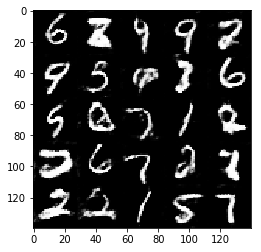

Epoch 2/2... Discriminator Loss: 1.5278... Generator Loss: 0.3434
Epoch 2/2... Discriminator Loss: 1.2682... Generator Loss: 2.9010
Epoch 2/2... Discriminator Loss: 0.9409... Generator Loss: 1.1196
Epoch 2/2... Discriminator Loss: 0.8028... Generator Loss: 0.9218
Epoch 2/2... Discriminator Loss: 0.8179... Generator Loss: 1.3046
Epoch 2/2... Discriminator Loss: 1.0820... Generator Loss: 0.6410
Epoch 2/2... Discriminator Loss: 1.2054... Generator Loss: 0.6037
Epoch 2/2... Discriminator Loss: 0.9472... Generator Loss: 1.0062
Epoch 2/2... Discriminator Loss: 1.6158... Generator Loss: 0.4668
Epoch 2/2... Discriminator Loss: 0.8698... Generator Loss: 0.8564


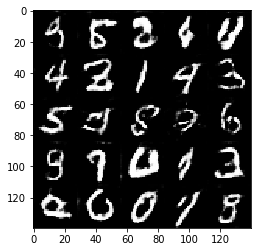

Epoch 2/2... Discriminator Loss: 1.2503... Generator Loss: 0.5331
Epoch 2/2... Discriminator Loss: 1.5449... Generator Loss: 0.3523
Epoch 2/2... Discriminator Loss: 1.0055... Generator Loss: 1.5839
Epoch 2/2... Discriminator Loss: 0.8590... Generator Loss: 1.2007
Epoch 2/2... Discriminator Loss: 0.9766... Generator Loss: 0.8121
Epoch 2/2... Discriminator Loss: 1.4829... Generator Loss: 0.4293
Epoch 2/2... Discriminator Loss: 1.3572... Generator Loss: 0.5061
Epoch 2/2... Discriminator Loss: 0.6595... Generator Loss: 1.9521
Epoch 2/2... Discriminator Loss: 0.7175... Generator Loss: 1.0683
Epoch 2/2... Discriminator Loss: 1.0539... Generator Loss: 0.7246


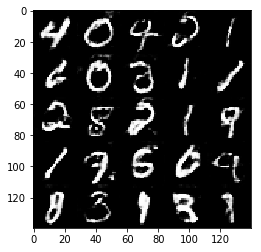

Epoch 2/2... Discriminator Loss: 3.5942... Generator Loss: 0.1014
Epoch 2/2... Discriminator Loss: 0.9300... Generator Loss: 1.0183
Epoch 2/2... Discriminator Loss: 1.2079... Generator Loss: 1.9883
Epoch 2/2... Discriminator Loss: 1.0079... Generator Loss: 0.6704
Epoch 2/2... Discriminator Loss: 1.0257... Generator Loss: 0.7263
Epoch 2/2... Discriminator Loss: 0.6923... Generator Loss: 2.1818
Epoch 2/2... Discriminator Loss: 1.1398... Generator Loss: 0.8289
Epoch 2/2... Discriminator Loss: 0.7807... Generator Loss: 0.8825
Epoch 2/2... Discriminator Loss: 0.8744... Generator Loss: 0.8151
Epoch 2/2... Discriminator Loss: 1.1829... Generator Loss: 0.6619


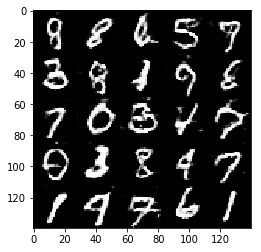

Epoch 2/2... Discriminator Loss: 0.8712... Generator Loss: 0.9275
Epoch 2/2... Discriminator Loss: 1.2500... Generator Loss: 0.5271
Epoch 2/2... Discriminator Loss: 1.9213... Generator Loss: 4.8618
Epoch 2/2... Discriminator Loss: 1.4381... Generator Loss: 0.4922
Epoch 2/2... Discriminator Loss: 1.7799... Generator Loss: 3.1026
Epoch 2/2... Discriminator Loss: 1.0600... Generator Loss: 0.6536
Epoch 2/2... Discriminator Loss: 2.1595... Generator Loss: 0.2187


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 4.0807... Generator Loss: 0.0370
Epoch 1/1... Discriminator Loss: 3.2973... Generator Loss: 0.0444
Epoch 1/1... Discriminator Loss: 0.2202... Generator Loss: 1.7696
Epoch 1/1... Discriminator Loss: 0.1041... Generator Loss: 5.6257
Epoch 1/1... Discriminator Loss: 5.4806... Generator Loss: 10.3086
Epoch 1/1... Discriminator Loss: 0.6395... Generator Loss: 1.0897
Epoch 1/1... Discriminator Loss: 0.5024... Generator Loss: 10.0026
Epoch 1/1... Discriminator Loss: 0.7638... Generator Loss: 1.0708
Epoch 1/1... Discriminator Loss: 0.1424... Generator Loss: 4.9829
Epoch 1/1... Discriminator Loss: 0.1402... Generator Loss: 2.6702


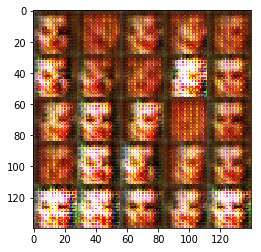

Epoch 1/1... Discriminator Loss: 0.3999... Generator Loss: 1.6578
Epoch 1/1... Discriminator Loss: 0.1385... Generator Loss: 3.7464
Epoch 1/1... Discriminator Loss: 0.3106... Generator Loss: 3.6449
Epoch 1/1... Discriminator Loss: 0.6299... Generator Loss: 0.9810
Epoch 1/1... Discriminator Loss: 0.1599... Generator Loss: 2.6491
Epoch 1/1... Discriminator Loss: 2.6218... Generator Loss: 0.5972
Epoch 1/1... Discriminator Loss: 0.1966... Generator Loss: 2.6439
Epoch 1/1... Discriminator Loss: 0.8246... Generator Loss: 6.5936
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 6.3513
Epoch 1/1... Discriminator Loss: 0.3311... Generator Loss: 2.2460


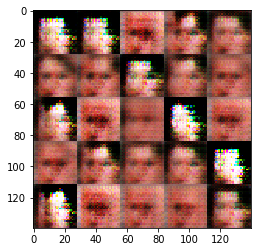

Epoch 1/1... Discriminator Loss: 0.0485... Generator Loss: 4.0405
Epoch 1/1... Discriminator Loss: 0.2532... Generator Loss: 2.1656
Epoch 1/1... Discriminator Loss: 2.6964... Generator Loss: 6.0860
Epoch 1/1... Discriminator Loss: 0.7537... Generator Loss: 1.0600
Epoch 1/1... Discriminator Loss: 2.0479... Generator Loss: 0.2442
Epoch 1/1... Discriminator Loss: 1.1262... Generator Loss: 2.1079
Epoch 1/1... Discriminator Loss: 0.7081... Generator Loss: 3.4802
Epoch 1/1... Discriminator Loss: 0.3938... Generator Loss: 2.3998
Epoch 1/1... Discriminator Loss: 0.8729... Generator Loss: 0.6754
Epoch 1/1... Discriminator Loss: 0.7091... Generator Loss: 2.8212


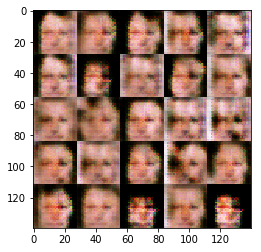

Epoch 1/1... Discriminator Loss: 1.4154... Generator Loss: 0.5058
Epoch 1/1... Discriminator Loss: 1.0450... Generator Loss: 0.5011
Epoch 1/1... Discriminator Loss: 1.2940... Generator Loss: 0.6886
Epoch 1/1... Discriminator Loss: 0.3021... Generator Loss: 2.0001
Epoch 1/1... Discriminator Loss: 2.9002... Generator Loss: 6.3848
Epoch 1/1... Discriminator Loss: 1.6417... Generator Loss: 6.1589
Epoch 1/1... Discriminator Loss: 0.4981... Generator Loss: 1.2970
Epoch 1/1... Discriminator Loss: 0.7533... Generator Loss: 1.3330
Epoch 1/1... Discriminator Loss: 2.6453... Generator Loss: 5.8477
Epoch 1/1... Discriminator Loss: 1.6389... Generator Loss: 4.1025


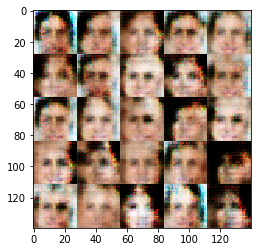

Epoch 1/1... Discriminator Loss: 0.9442... Generator Loss: 0.7601
Epoch 1/1... Discriminator Loss: 2.3848... Generator Loss: 5.2568
Epoch 1/1... Discriminator Loss: 1.1848... Generator Loss: 2.4053
Epoch 1/1... Discriminator Loss: 0.6483... Generator Loss: 1.5735
Epoch 1/1... Discriminator Loss: 0.6034... Generator Loss: 2.0585
Epoch 1/1... Discriminator Loss: 1.5470... Generator Loss: 0.4210
Epoch 1/1... Discriminator Loss: 0.8178... Generator Loss: 3.4245
Epoch 1/1... Discriminator Loss: 1.0562... Generator Loss: 3.7107
Epoch 1/1... Discriminator Loss: 0.5203... Generator Loss: 2.3355
Epoch 1/1... Discriminator Loss: 0.6327... Generator Loss: 1.3750


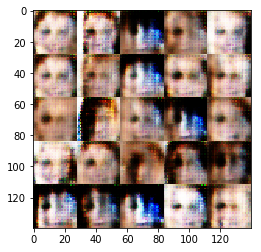

Epoch 1/1... Discriminator Loss: 0.4492... Generator Loss: 1.4937
Epoch 1/1... Discriminator Loss: 0.8853... Generator Loss: 0.9697
Epoch 1/1... Discriminator Loss: 1.3141... Generator Loss: 0.5529
Epoch 1/1... Discriminator Loss: 0.9513... Generator Loss: 1.0129
Epoch 1/1... Discriminator Loss: 0.3827... Generator Loss: 1.9469
Epoch 1/1... Discriminator Loss: 0.4647... Generator Loss: 2.4516
Epoch 1/1... Discriminator Loss: 0.1971... Generator Loss: 2.3638
Epoch 1/1... Discriminator Loss: 0.9531... Generator Loss: 0.8969
Epoch 1/1... Discriminator Loss: 0.8290... Generator Loss: 0.9756
Epoch 1/1... Discriminator Loss: 0.8969... Generator Loss: 4.1006


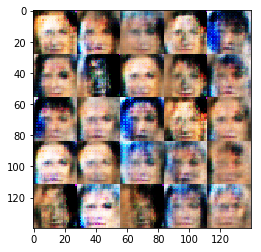

Epoch 1/1... Discriminator Loss: 2.5948... Generator Loss: 0.1309
Epoch 1/1... Discriminator Loss: 0.4166... Generator Loss: 2.5109
Epoch 1/1... Discriminator Loss: 1.0419... Generator Loss: 3.4158
Epoch 1/1... Discriminator Loss: 1.1322... Generator Loss: 0.6727
Epoch 1/1... Discriminator Loss: 0.4026... Generator Loss: 2.9833
Epoch 1/1... Discriminator Loss: 0.4026... Generator Loss: 1.5084
Epoch 1/1... Discriminator Loss: 1.1569... Generator Loss: 0.6190
Epoch 1/1... Discriminator Loss: 1.3389... Generator Loss: 0.5083
Epoch 1/1... Discriminator Loss: 1.3013... Generator Loss: 0.5433
Epoch 1/1... Discriminator Loss: 0.3476... Generator Loss: 1.9852


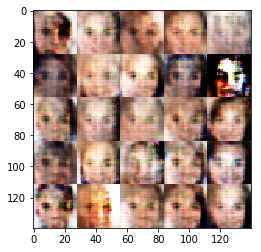

Epoch 1/1... Discriminator Loss: 0.4651... Generator Loss: 3.1920
Epoch 1/1... Discriminator Loss: 0.7201... Generator Loss: 2.3780
Epoch 1/1... Discriminator Loss: 0.6146... Generator Loss: 1.1963
Epoch 1/1... Discriminator Loss: 0.6175... Generator Loss: 1.3556
Epoch 1/1... Discriminator Loss: 1.7779... Generator Loss: 0.3985
Epoch 1/1... Discriminator Loss: 1.5853... Generator Loss: 0.3741
Epoch 1/1... Discriminator Loss: 0.5012... Generator Loss: 1.8202
Epoch 1/1... Discriminator Loss: 0.9686... Generator Loss: 1.1305
Epoch 1/1... Discriminator Loss: 0.3328... Generator Loss: 2.5859
Epoch 1/1... Discriminator Loss: 0.8747... Generator Loss: 0.9977


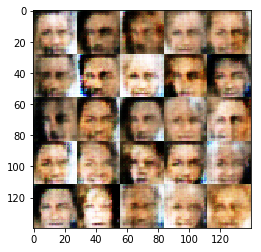

Epoch 1/1... Discriminator Loss: 1.8981... Generator Loss: 0.3343
Epoch 1/1... Discriminator Loss: 0.8288... Generator Loss: 3.3606
Epoch 1/1... Discriminator Loss: 0.4311... Generator Loss: 2.2491
Epoch 1/1... Discriminator Loss: 0.2815... Generator Loss: 2.8128
Epoch 1/1... Discriminator Loss: 0.7085... Generator Loss: 1.2066
Epoch 1/1... Discriminator Loss: 0.9034... Generator Loss: 0.7391
Epoch 1/1... Discriminator Loss: 0.3829... Generator Loss: 1.9799
Epoch 1/1... Discriminator Loss: 2.7246... Generator Loss: 0.1501
Epoch 1/1... Discriminator Loss: 0.3514... Generator Loss: 2.3668
Epoch 1/1... Discriminator Loss: 0.2083... Generator Loss: 2.2177


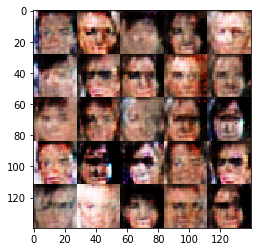

Epoch 1/1... Discriminator Loss: 0.4946... Generator Loss: 1.3485
Epoch 1/1... Discriminator Loss: 0.4962... Generator Loss: 1.6066
Epoch 1/1... Discriminator Loss: 0.8575... Generator Loss: 2.5488
Epoch 1/1... Discriminator Loss: 0.5517... Generator Loss: 1.2709
Epoch 1/1... Discriminator Loss: 1.1093... Generator Loss: 1.0230
Epoch 1/1... Discriminator Loss: 1.1576... Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 0.7395... Generator Loss: 1.7606
Epoch 1/1... Discriminator Loss: 0.6988... Generator Loss: 1.3329
Epoch 1/1... Discriminator Loss: 0.5061... Generator Loss: 1.5989
Epoch 1/1... Discriminator Loss: 4.1241... Generator Loss: 5.6532


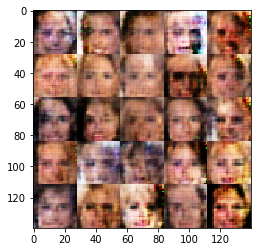

Epoch 1/1... Discriminator Loss: 0.8573... Generator Loss: 0.8455
Epoch 1/1... Discriminator Loss: 0.6657... Generator Loss: 1.7570
Epoch 1/1... Discriminator Loss: 0.6470... Generator Loss: 1.2977
Epoch 1/1... Discriminator Loss: 0.8065... Generator Loss: 0.9541
Epoch 1/1... Discriminator Loss: 0.5213... Generator Loss: 1.5549
Epoch 1/1... Discriminator Loss: 0.6288... Generator Loss: 1.1980
Epoch 1/1... Discriminator Loss: 0.9230... Generator Loss: 0.8829
Epoch 1/1... Discriminator Loss: 0.9095... Generator Loss: 2.2980
Epoch 1/1... Discriminator Loss: 0.5747... Generator Loss: 1.2068
Epoch 1/1... Discriminator Loss: 1.8700... Generator Loss: 0.2864


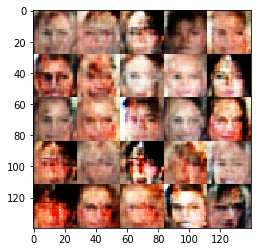

Epoch 1/1... Discriminator Loss: 0.3369... Generator Loss: 2.4578
Epoch 1/1... Discriminator Loss: 0.5274... Generator Loss: 1.5123
Epoch 1/1... Discriminator Loss: 0.8862... Generator Loss: 0.7816
Epoch 1/1... Discriminator Loss: 0.7814... Generator Loss: 0.9488
Epoch 1/1... Discriminator Loss: 0.3489... Generator Loss: 1.7340
Epoch 1/1... Discriminator Loss: 0.8913... Generator Loss: 1.0053
Epoch 1/1... Discriminator Loss: 0.2306... Generator Loss: 2.3745
Epoch 1/1... Discriminator Loss: 0.6506... Generator Loss: 2.0342
Epoch 1/1... Discriminator Loss: 1.0112... Generator Loss: 0.8282
Epoch 1/1... Discriminator Loss: 2.4967... Generator Loss: 4.9138


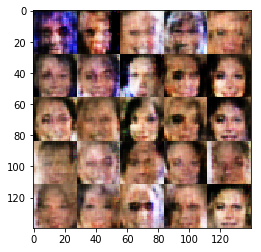

Epoch 1/1... Discriminator Loss: 0.6113... Generator Loss: 1.5676
Epoch 1/1... Discriminator Loss: 1.0093... Generator Loss: 4.3750
Epoch 1/1... Discriminator Loss: 0.5893... Generator Loss: 4.0263
Epoch 1/1... Discriminator Loss: 0.6789... Generator Loss: 1.0410
Epoch 1/1... Discriminator Loss: 0.3777... Generator Loss: 1.8846
Epoch 1/1... Discriminator Loss: 0.6431... Generator Loss: 3.1634
Epoch 1/1... Discriminator Loss: 1.1239... Generator Loss: 0.6222
Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 0.4986
Epoch 1/1... Discriminator Loss: 0.8674... Generator Loss: 0.8873
Epoch 1/1... Discriminator Loss: 0.5754... Generator Loss: 1.7418


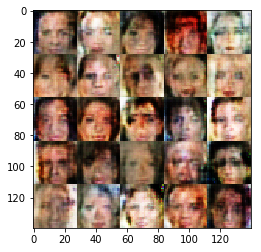

Epoch 1/1... Discriminator Loss: 0.4303... Generator Loss: 1.9236
Epoch 1/1... Discriminator Loss: 0.9427... Generator Loss: 0.7798
Epoch 1/1... Discriminator Loss: 0.8546... Generator Loss: 2.0109
Epoch 1/1... Discriminator Loss: 0.9174... Generator Loss: 4.6901
Epoch 1/1... Discriminator Loss: 3.4148... Generator Loss: 6.1450
Epoch 1/1... Discriminator Loss: 1.8571... Generator Loss: 0.2686
Epoch 1/1... Discriminator Loss: 1.2230... Generator Loss: 0.5693
Epoch 1/1... Discriminator Loss: 1.4789... Generator Loss: 4.1772
Epoch 1/1... Discriminator Loss: 0.2298... Generator Loss: 2.7739
Epoch 1/1... Discriminator Loss: 0.1248... Generator Loss: 3.5284


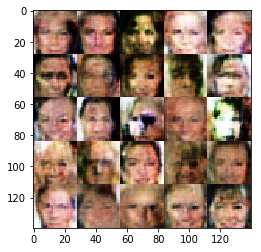

Epoch 1/1... Discriminator Loss: 1.1300... Generator Loss: 0.5890
Epoch 1/1... Discriminator Loss: 0.7404... Generator Loss: 1.3892
Epoch 1/1... Discriminator Loss: 0.7288... Generator Loss: 4.4708
Epoch 1/1... Discriminator Loss: 0.5926... Generator Loss: 2.0421
Epoch 1/1... Discriminator Loss: 0.5141... Generator Loss: 1.2603
Epoch 1/1... Discriminator Loss: 0.4978... Generator Loss: 2.5090
Epoch 1/1... Discriminator Loss: 0.7694... Generator Loss: 4.2592
Epoch 1/1... Discriminator Loss: 0.6147... Generator Loss: 1.1852
Epoch 1/1... Discriminator Loss: 0.7585... Generator Loss: 1.0506
Epoch 1/1... Discriminator Loss: 0.7491... Generator Loss: 1.8488


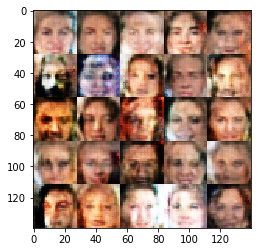

Epoch 1/1... Discriminator Loss: 0.7208... Generator Loss: 1.0220
Epoch 1/1... Discriminator Loss: 0.6063... Generator Loss: 1.4582
Epoch 1/1... Discriminator Loss: 0.7223... Generator Loss: 1.0927
Epoch 1/1... Discriminator Loss: 0.2551... Generator Loss: 2.6901
Epoch 1/1... Discriminator Loss: 0.9911... Generator Loss: 0.7270
Epoch 1/1... Discriminator Loss: 0.3204... Generator Loss: 1.8965
Epoch 1/1... Discriminator Loss: 2.3275... Generator Loss: 5.5695
Epoch 1/1... Discriminator Loss: 1.2886... Generator Loss: 0.4653
Epoch 1/1... Discriminator Loss: 0.3925... Generator Loss: 1.5812
Epoch 1/1... Discriminator Loss: 0.6816... Generator Loss: 1.0235


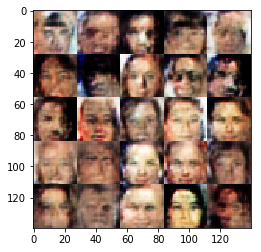

Epoch 1/1... Discriminator Loss: 0.8443... Generator Loss: 0.8677
Epoch 1/1... Discriminator Loss: 0.7251... Generator Loss: 1.3783
Epoch 1/1... Discriminator Loss: 1.2951... Generator Loss: 4.7761
Epoch 1/1... Discriminator Loss: 0.5463... Generator Loss: 1.7049
Epoch 1/1... Discriminator Loss: 0.6311... Generator Loss: 1.7530
Epoch 1/1... Discriminator Loss: 0.2520... Generator Loss: 2.1832
Epoch 1/1... Discriminator Loss: 0.0875... Generator Loss: 3.7683
Epoch 1/1... Discriminator Loss: 1.3895... Generator Loss: 0.7277
Epoch 1/1... Discriminator Loss: 0.9099... Generator Loss: 1.1450
Epoch 1/1... Discriminator Loss: 0.9728... Generator Loss: 0.8192


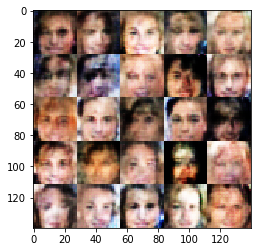

Epoch 1/1... Discriminator Loss: 1.5953... Generator Loss: 0.3194
Epoch 1/1... Discriminator Loss: 0.8275... Generator Loss: 0.8188
Epoch 1/1... Discriminator Loss: 0.6487... Generator Loss: 1.2731
Epoch 1/1... Discriminator Loss: 0.5259... Generator Loss: 1.8602
Epoch 1/1... Discriminator Loss: 0.3248... Generator Loss: 2.1216
Epoch 1/1... Discriminator Loss: 0.4024... Generator Loss: 1.5680
Epoch 1/1... Discriminator Loss: 0.8128... Generator Loss: 3.0317
Epoch 1/1... Discriminator Loss: 1.0872... Generator Loss: 0.7153
Epoch 1/1... Discriminator Loss: 0.6303... Generator Loss: 1.4652
Epoch 1/1... Discriminator Loss: 0.4244... Generator Loss: 2.6455


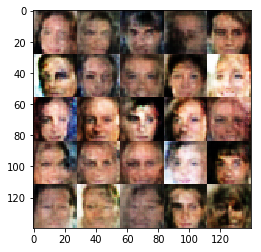

Epoch 1/1... Discriminator Loss: 0.7735... Generator Loss: 1.0955
Epoch 1/1... Discriminator Loss: 0.7757... Generator Loss: 1.1442
Epoch 1/1... Discriminator Loss: 0.6732... Generator Loss: 1.0360
Epoch 1/1... Discriminator Loss: 0.6935... Generator Loss: 1.2685
Epoch 1/1... Discriminator Loss: 0.5151... Generator Loss: 1.4411
Epoch 1/1... Discriminator Loss: 0.5244... Generator Loss: 1.5837
Epoch 1/1... Discriminator Loss: 0.7438... Generator Loss: 2.4236
Epoch 1/1... Discriminator Loss: 0.8500... Generator Loss: 1.0192
Epoch 1/1... Discriminator Loss: 1.0805... Generator Loss: 0.7629
Epoch 1/1... Discriminator Loss: 0.5104... Generator Loss: 1.5270


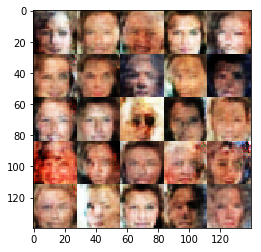

Epoch 1/1... Discriminator Loss: 1.3886... Generator Loss: 5.4991
Epoch 1/1... Discriminator Loss: 0.3486... Generator Loss: 1.9422
Epoch 1/1... Discriminator Loss: 0.9542... Generator Loss: 3.9542
Epoch 1/1... Discriminator Loss: 1.1406... Generator Loss: 0.6075
Epoch 1/1... Discriminator Loss: 0.7199... Generator Loss: 1.0484
Epoch 1/1... Discriminator Loss: 0.2304... Generator Loss: 2.9938
Epoch 1/1... Discriminator Loss: 0.5365... Generator Loss: 2.4804
Epoch 1/1... Discriminator Loss: 2.1095... Generator Loss: 0.2314
Epoch 1/1... Discriminator Loss: 0.3281... Generator Loss: 1.9630
Epoch 1/1... Discriminator Loss: 1.3110... Generator Loss: 0.5539


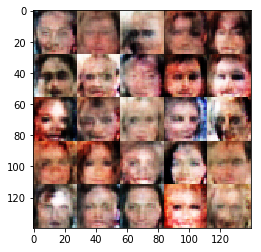

Epoch 1/1... Discriminator Loss: 0.7735... Generator Loss: 1.1528
Epoch 1/1... Discriminator Loss: 0.5398... Generator Loss: 1.3722
Epoch 1/1... Discriminator Loss: 0.7263... Generator Loss: 1.1290
Epoch 1/1... Discriminator Loss: 0.6940... Generator Loss: 1.2460
Epoch 1/1... Discriminator Loss: 0.8245... Generator Loss: 3.6584
Epoch 1/1... Discriminator Loss: 0.7438... Generator Loss: 0.9875
Epoch 1/1... Discriminator Loss: 0.6894... Generator Loss: 1.0872
Epoch 1/1... Discriminator Loss: 0.1660... Generator Loss: 3.5122
Epoch 1/1... Discriminator Loss: 0.7090... Generator Loss: 2.1929
Epoch 1/1... Discriminator Loss: 0.5913... Generator Loss: 1.5894


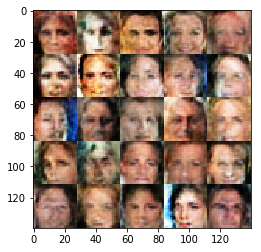

Epoch 1/1... Discriminator Loss: 0.5240... Generator Loss: 1.4635
Epoch 1/1... Discriminator Loss: 0.6852... Generator Loss: 1.2383
Epoch 1/1... Discriminator Loss: 0.1811... Generator Loss: 3.2003
Epoch 1/1... Discriminator Loss: 0.2229... Generator Loss: 3.0149
Epoch 1/1... Discriminator Loss: 0.1506... Generator Loss: 3.9122
Epoch 1/1... Discriminator Loss: 0.1101... Generator Loss: 2.9612
Epoch 1/1... Discriminator Loss: 0.5630... Generator Loss: 2.2560
Epoch 1/1... Discriminator Loss: 0.5781... Generator Loss: 3.5374
Epoch 1/1... Discriminator Loss: 3.5423... Generator Loss: 3.6361
Epoch 1/1... Discriminator Loss: 0.3664... Generator Loss: 1.8446


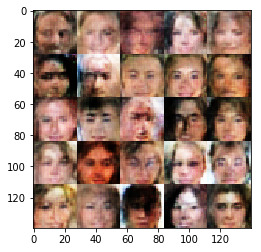

Epoch 1/1... Discriminator Loss: 0.7570... Generator Loss: 1.0885
Epoch 1/1... Discriminator Loss: 0.7538... Generator Loss: 1.0237
Epoch 1/1... Discriminator Loss: 0.5937... Generator Loss: 1.3380
Epoch 1/1... Discriminator Loss: 0.8135... Generator Loss: 0.9562
Epoch 1/1... Discriminator Loss: 1.1464... Generator Loss: 0.7351
Epoch 1/1... Discriminator Loss: 0.9217... Generator Loss: 2.8798
Epoch 1/1... Discriminator Loss: 0.5808... Generator Loss: 1.2674
Epoch 1/1... Discriminator Loss: 0.4179... Generator Loss: 2.2783
Epoch 1/1... Discriminator Loss: 0.7148... Generator Loss: 1.0117
Epoch 1/1... Discriminator Loss: 0.2790... Generator Loss: 2.2598


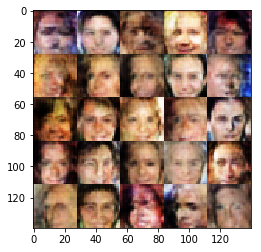

Epoch 1/1... Discriminator Loss: 0.2789... Generator Loss: 2.0641
Epoch 1/1... Discriminator Loss: 0.1848... Generator Loss: 2.6688
Epoch 1/1... Discriminator Loss: 0.9129... Generator Loss: 1.4024
Epoch 1/1... Discriminator Loss: 2.1801... Generator Loss: 0.2866
Epoch 1/1... Discriminator Loss: 0.6378... Generator Loss: 1.1520
Epoch 1/1... Discriminator Loss: 0.2985... Generator Loss: 1.9187
Epoch 1/1... Discriminator Loss: 1.4646... Generator Loss: 0.4842
Epoch 1/1... Discriminator Loss: 0.2882... Generator Loss: 1.9804
Epoch 1/1... Discriminator Loss: 0.2753... Generator Loss: 4.1721
Epoch 1/1... Discriminator Loss: 1.4852... Generator Loss: 3.4869


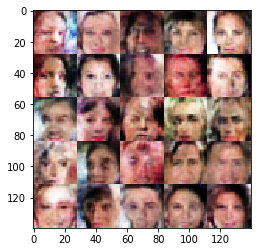

Epoch 1/1... Discriminator Loss: 0.6893... Generator Loss: 1.2728
Epoch 1/1... Discriminator Loss: 0.7624... Generator Loss: 1.1122
Epoch 1/1... Discriminator Loss: 0.6372... Generator Loss: 3.9716
Epoch 1/1... Discriminator Loss: 0.2827... Generator Loss: 1.9803
Epoch 1/1... Discriminator Loss: 0.3380... Generator Loss: 2.9132
Epoch 1/1... Discriminator Loss: 0.4125... Generator Loss: 1.6998
Epoch 1/1... Discriminator Loss: 0.4198... Generator Loss: 1.3677
Epoch 1/1... Discriminator Loss: 0.1829... Generator Loss: 2.3673
Epoch 1/1... Discriminator Loss: 0.2429... Generator Loss: 2.7230
Epoch 1/1... Discriminator Loss: 0.4631... Generator Loss: 2.2010


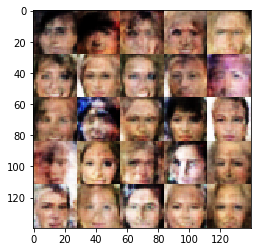

Epoch 1/1... Discriminator Loss: 0.4107... Generator Loss: 1.8487
Epoch 1/1... Discriminator Loss: 0.1996... Generator Loss: 2.9388
Epoch 1/1... Discriminator Loss: 0.6764... Generator Loss: 1.9739
Epoch 1/1... Discriminator Loss: 0.1640... Generator Loss: 2.5827
Epoch 1/1... Discriminator Loss: 4.4143... Generator Loss: 8.2461
Epoch 1/1... Discriminator Loss: 0.8954... Generator Loss: 3.1870
Epoch 1/1... Discriminator Loss: 0.8429... Generator Loss: 2.1900
Epoch 1/1... Discriminator Loss: 0.3387... Generator Loss: 1.8235
Epoch 1/1... Discriminator Loss: 0.3741... Generator Loss: 1.6575
Epoch 1/1... Discriminator Loss: 0.1117... Generator Loss: 3.1949


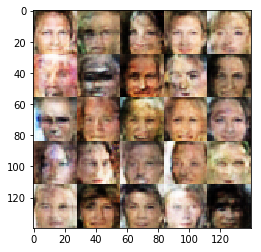

Epoch 1/1... Discriminator Loss: 0.5329... Generator Loss: 1.1586
Epoch 1/1... Discriminator Loss: 0.6063... Generator Loss: 1.1994
Epoch 1/1... Discriminator Loss: 0.7124... Generator Loss: 1.2510
Epoch 1/1... Discriminator Loss: 0.4583... Generator Loss: 1.5726
Epoch 1/1... Discriminator Loss: 0.5035... Generator Loss: 1.3898
Epoch 1/1... Discriminator Loss: 0.5130... Generator Loss: 1.3699
Epoch 1/1... Discriminator Loss: 0.1728... Generator Loss: 2.7169
Epoch 1/1... Discriminator Loss: 0.1542... Generator Loss: 3.1134
Epoch 1/1... Discriminator Loss: 1.5842... Generator Loss: 0.4833
Epoch 1/1... Discriminator Loss: 0.6198... Generator Loss: 2.2638


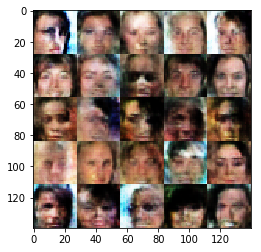

Epoch 1/1... Discriminator Loss: 0.4086... Generator Loss: 1.5629
Epoch 1/1... Discriminator Loss: 1.6603... Generator Loss: 0.5934
Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 0.5282
Epoch 1/1... Discriminator Loss: 0.7113... Generator Loss: 1.1148
Epoch 1/1... Discriminator Loss: 0.6605... Generator Loss: 1.1047
Epoch 1/1... Discriminator Loss: 0.3880... Generator Loss: 2.2144
Epoch 1/1... Discriminator Loss: 1.2672... Generator Loss: 5.2122
Epoch 1/1... Discriminator Loss: 0.2324... Generator Loss: 2.2713
Epoch 1/1... Discriminator Loss: 0.5457... Generator Loss: 1.2948
Epoch 1/1... Discriminator Loss: 0.1365... Generator Loss: 3.3069


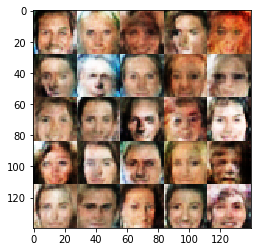

Epoch 1/1... Discriminator Loss: 0.1258... Generator Loss: 3.0091
Epoch 1/1... Discriminator Loss: 1.5651... Generator Loss: 6.0045
Epoch 1/1... Discriminator Loss: 0.8364... Generator Loss: 0.8403
Epoch 1/1... Discriminator Loss: 0.2791... Generator Loss: 3.2790
Epoch 1/1... Discriminator Loss: 0.6265... Generator Loss: 5.6523
Epoch 1/1... Discriminator Loss: 0.4279... Generator Loss: 2.1728
Epoch 1/1... Discriminator Loss: 0.5894... Generator Loss: 1.2594
Epoch 1/1... Discriminator Loss: 0.5233... Generator Loss: 1.7615
Epoch 1/1... Discriminator Loss: 0.7831... Generator Loss: 1.0958
Epoch 1/1... Discriminator Loss: 0.8195... Generator Loss: 3.1386


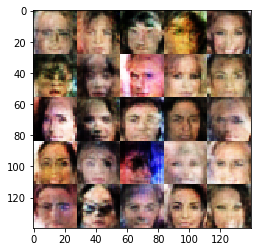

Epoch 1/1... Discriminator Loss: 0.3968... Generator Loss: 2.2198
Epoch 1/1... Discriminator Loss: 0.1062... Generator Loss: 3.4992
Epoch 1/1... Discriminator Loss: 0.2769... Generator Loss: 2.9290
Epoch 1/1... Discriminator Loss: 0.1673... Generator Loss: 2.3705
Epoch 1/1... Discriminator Loss: 0.2757... Generator Loss: 2.1553
Epoch 1/1... Discriminator Loss: 0.1505... Generator Loss: 2.8876
Epoch 1/1... Discriminator Loss: 0.0543... Generator Loss: 5.4035
Epoch 1/1... Discriminator Loss: 0.0581... Generator Loss: 4.2138
Epoch 1/1... Discriminator Loss: 1.5556... Generator Loss: 4.9350
Epoch 1/1... Discriminator Loss: 0.8569... Generator Loss: 1.0215


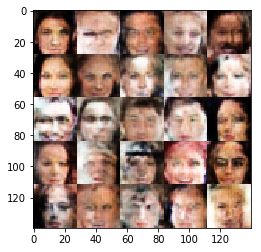

Epoch 1/1... Discriminator Loss: 0.5299... Generator Loss: 2.0464
Epoch 1/1... Discriminator Loss: 0.7185... Generator Loss: 1.4012
Epoch 1/1... Discriminator Loss: 0.5394... Generator Loss: 2.2543
Epoch 1/1... Discriminator Loss: 1.0700... Generator Loss: 0.8569
Epoch 1/1... Discriminator Loss: 0.4259... Generator Loss: 2.1284
Epoch 1/1... Discriminator Loss: 0.5991... Generator Loss: 4.1275
Epoch 1/1... Discriminator Loss: 0.0935... Generator Loss: 3.5808
Epoch 1/1... Discriminator Loss: 0.5655... Generator Loss: 1.2864
Epoch 1/1... Discriminator Loss: 0.1492... Generator Loss: 3.0714
Epoch 1/1... Discriminator Loss: 0.2063... Generator Loss: 2.2361


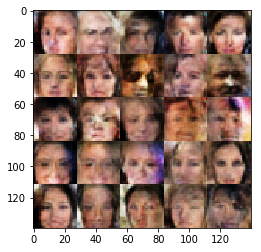

Epoch 1/1... Discriminator Loss: 0.1193... Generator Loss: 3.1047
Epoch 1/1... Discriminator Loss: 1.3530... Generator Loss: 0.6730
Epoch 1/1... Discriminator Loss: 0.3459... Generator Loss: 1.9648
Epoch 1/1... Discriminator Loss: 0.3483... Generator Loss: 1.8299
Epoch 1/1... Discriminator Loss: 0.5833... Generator Loss: 1.1293
Epoch 1/1... Discriminator Loss: 0.3014... Generator Loss: 1.9237


In [15]:
batch_size = batch_size
z_dim = z_dim
learning_rate = learning_rate
beta1 = beta1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.